In [1]:
import pandas as pd
df=pd.read_csv('SAH.csv', encoding='ascii')
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

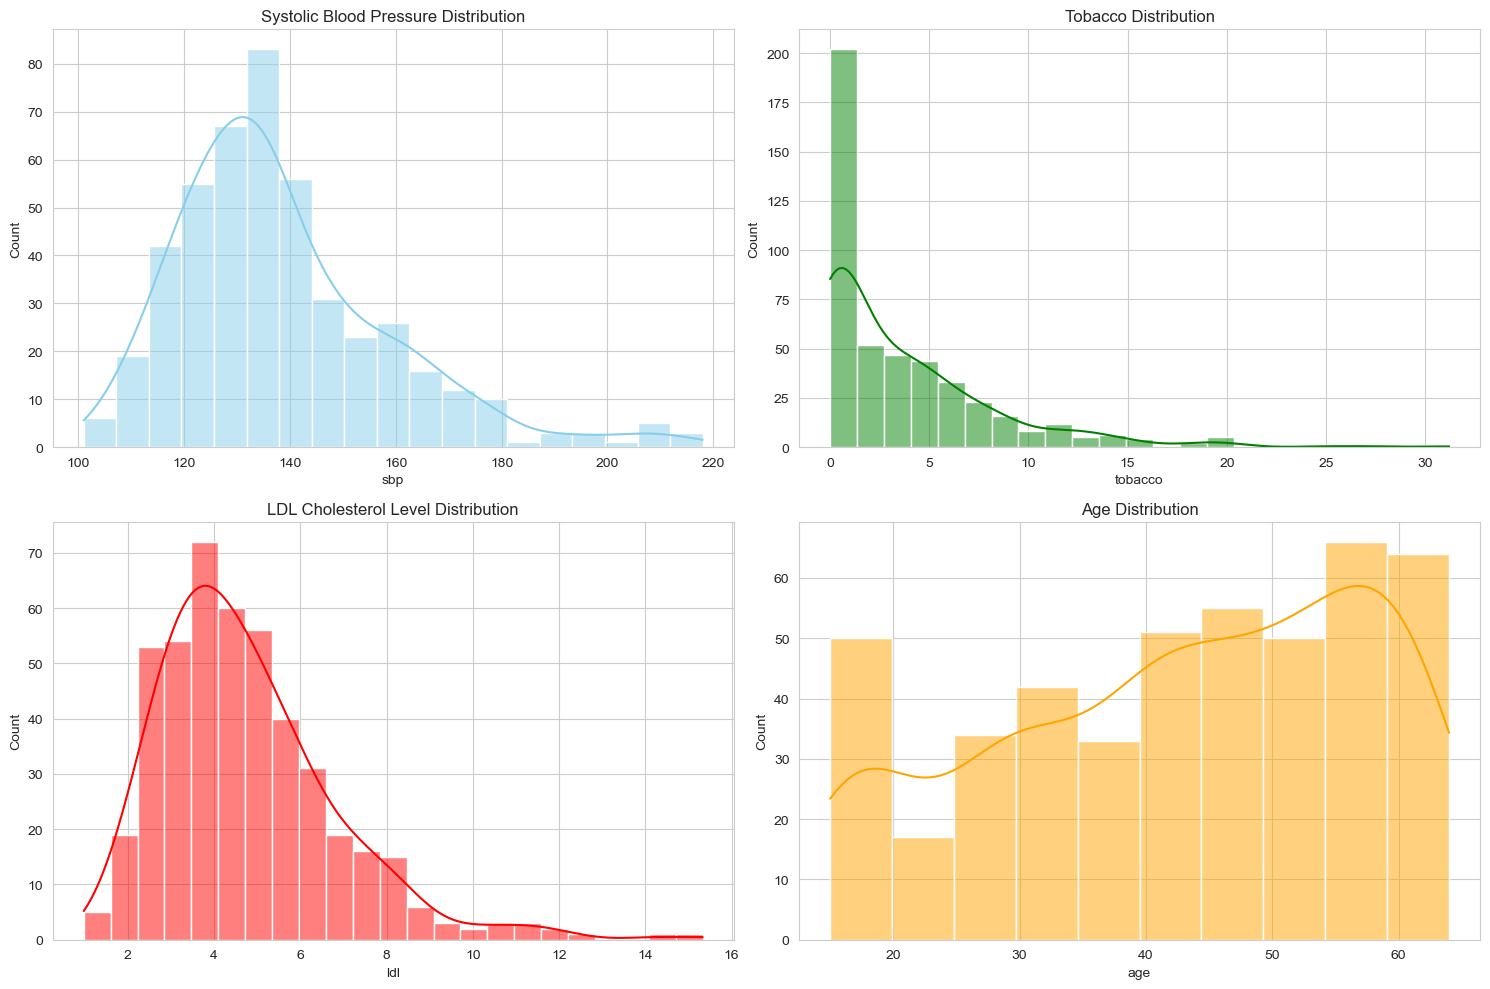

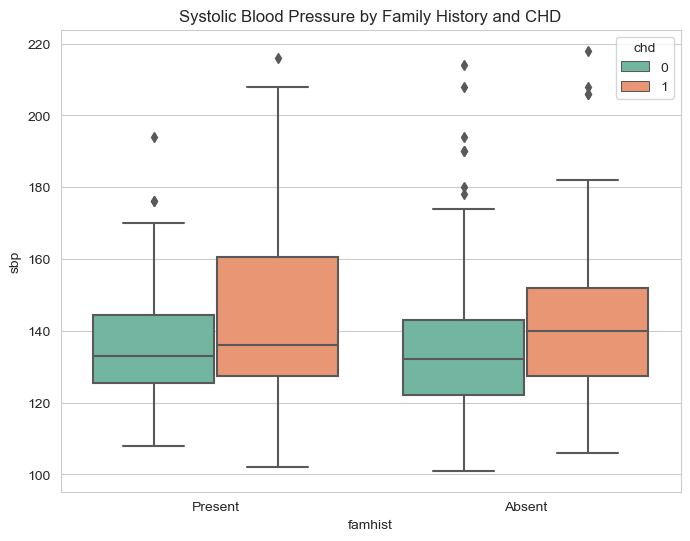

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting distributions of numerical variables
plt.figure(figsize=(15, 10), facecolor='white')

# Systolic Blood Pressure Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['sbp'], kde=True, color='skyblue')
plt.title('Systolic Blood Pressure Distribution')

# Tobacco Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['tobacco'], kde=True, color='green')
plt.title('Tobacco Distribution')

# LDL Cholesterol Level Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['ldl'], kde=True, color='red')
plt.title('LDL Cholesterol Level Distribution')

# Age Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['age'], kde=True, color='orange')
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

# Boxplot for CHD by Family History
plt.figure(figsize=(8, 6), facecolor='white')
sns.boxplot(x='famhist', y='sbp', hue='chd', data=df, palette='Set2')
plt.title('Systolic Blood Pressure by Family History and CHD')
plt.show()

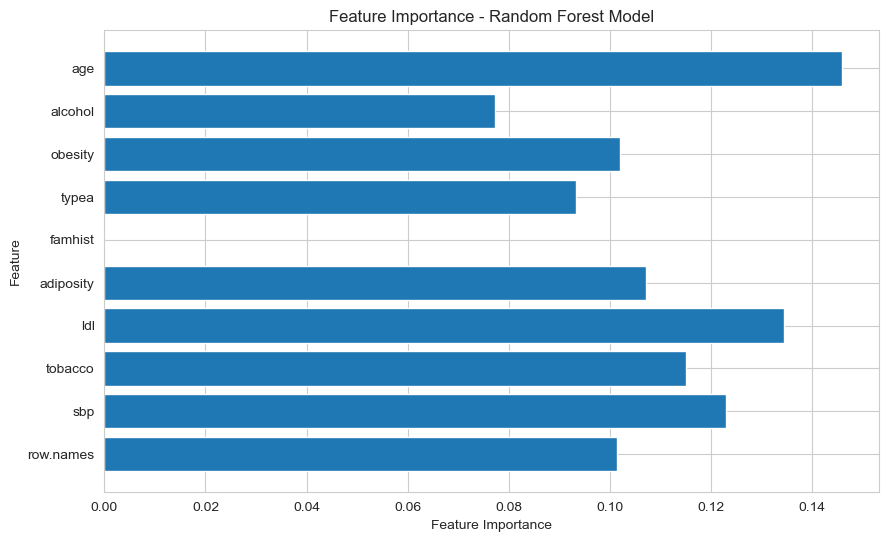

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert 'famhist' from categorical to numerical
df['famhist'] = df['famhist'].apply(lambda x: 1 if x == 'Present' else 0)

# Define features and target
X = df.drop(['chd'], axis=1)
y = df['chd']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
feature_importances = rf_model.feature_importances_

# Plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest Model')
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print('Random Forest Model Accuracy:', accuracy_rf)
print('Confusion Matrix:\
', conf_matrix_rf)
print('Classification Report:\
', class_report_rf)

Random Forest Model Accuracy: 0.6402877697841727
Confusion Matrix: [[72 18]
 [32 17]]
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.80      0.74        90
           1       0.49      0.35      0.40        49

    accuracy                           0.64       139
   macro avg       0.59      0.57      0.57       139
weighted avg       0.62      0.64      0.62       139



In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


le = LabelEncoder()
df['famhist'] = le.fit_transform(df['famhist'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy_lr)
print('Confusion Matrix:\
', conf_matrix)
print('Classification Report:\
', class_report)

Accuracy: 0.7204301075268817
Confusion Matrix: [[50  9]
 [17 17]]
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.85      0.79        59
           1       0.65      0.50      0.57        34

    accuracy                           0.72        93
   macro avg       0.70      0.67      0.68        93
weighted avg       0.71      0.72      0.71        93



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


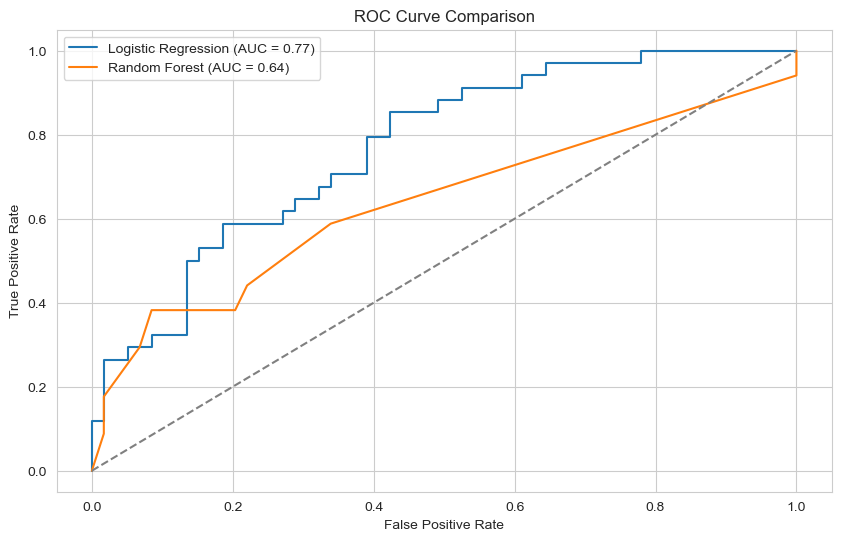

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict probabilities
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC scores
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


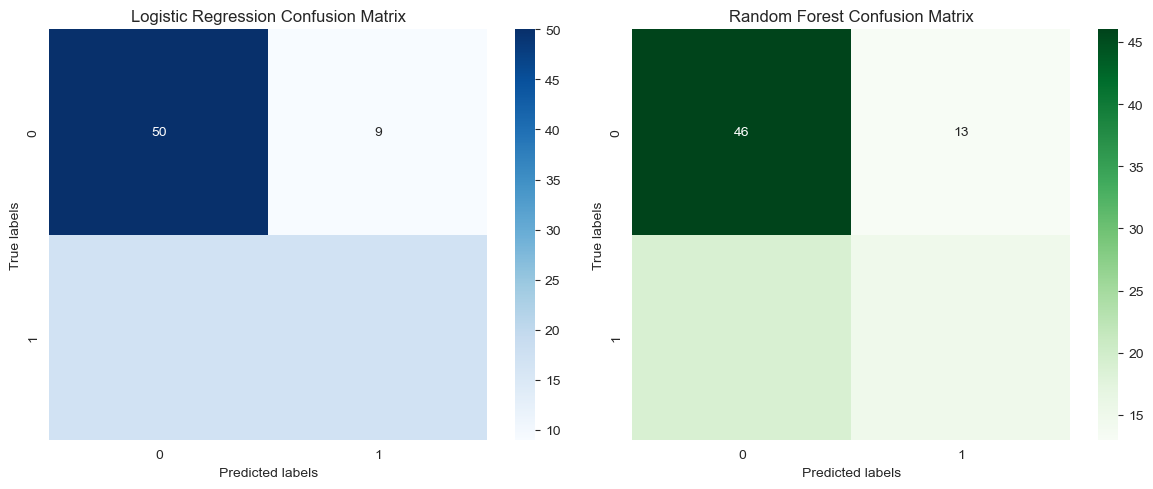

In [18]:
from sklearn.metrics import confusion_matrix

lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_preds)
rf_cm = confusion_matrix(y_test, rf_preds)


fig, ax = plt.subplots(1, 2, figsize=(12, 5), facecolor='white')

sns.heatmap(lr_cm, annot=True, fmt='g', ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

sns.heatmap(rf_cm, annot=True, fmt='g', ax=ax[1], cmap='Greens')
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')

plt.tight_layout()
plt.show()